# Coursera Capstone Project

## The Battle of Neighborhoods - City-to-City Comparison

### A. J. Bellmann

### Contents:

### 1. Part 1: Introduction of the business problem and Data description (week 1)

#### 1.1 Introduction of the business problem and who would be interested in this project
#### 1.2 Data description that will be used to solve the problem

### 2. Part 2: Used methodology, results and conclusion (week 2)

#### 2.1 Methodology of the report and description 0f exploratory data analysis, performed statistical testing, used machine learnings
#### 2.2 Results section
#### 2.3 Discussion section, noted observations, recommendations based on the results
#### 2.4 Conclusion section

## 1.  Introduction of the business problem and Data description

### 1.1 Description of the Business Problem

### The Importance of Internal Mobility - how to keep good employees once they are hired and how to measure Quality-of-living differentials between cities? 



Today, mobility is mainstream, and it’s a business strategy that can’t be overlooked any longer. The latest research on mobility is also showing that mobility impacts the workforce, leads to better processes and more productivity — and 100% more satisfied employees. 

Nothing is more motivating than the feeling that you are in control of your career. Many professionals are willing to explore opportunities with another company, even if they are happy in their current role.

Companies have historically moved operations to new locations to tap into new talent pools and benefit from lower costs, but they should increasingly consider allowing mobile employees a greater flexibility in the choice of where and how they want to work.

Employee Mobility - MOVING PEOPLE TO JOB - should be equally considered with traditional mobility  - MOVING JOB TO PEOPLE.

Moving people to jobs is sometimes problematic (family issues, assignment costs,  risks in the host locations), thats why we have to find anwsers to following questions:


### How to encourage employment mobility?

To encourage employment mobility you need reliable information to help you calculate fair, consistent expatriate allowances and to provide employee with reliable information about the host locations to support his decision. 

####  In this project we will concentrate on the last point - 
####  - provide employee with reliable information about the host locations to support his decision.

### What exactly is making a city more attractive to live in and to international business investment? 

How to establish quality-of-living differentials between cities and which factors to use for it? 
Here we need to define the key features (categories) playing the main role for quality of living, which are:

- Schools and education 
- Medical and health considerations
- Consumer goods
- Cultural environment
- Natural environment
- Public services and transport
- Recreation
- Socio-cultural environment
- Economic environment
- Political and social environment


### How to get clear, objective information on quality of living differences between cities around the world?

To do City-to-City comparison we will need external data sources, which will be described in the next section 1.2

### Interested Audience: 
International Organisations or organisations with different locations interested in improving of  career mobility and  keeping good staff.  Business leaders can empower their employees with access to opportunities and encourage them to be active participants in the business, rather than setting a passive culture.

Privat persons/ employees looking for opportunities in another city

### 1.2 Description of the data and how it will be used to solve the problem

### 1.2.1 Assumption  we have taken: 

In this project we will concentrate on City-to-City Comparison with assumption of political, social and economic environment to be similar.


### 1.2.2 Data needed for City-to-City Comparison that summarizes the difference in the quality of natural environment

The following data is required to answer the issues of the problem:
- List of main european cities with their geodata (latitude and longitude) and population
- Foursquare and geopy data to find number of green areas (parks) of european capitals


In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from bs4 import BeautifulSoup as bsoup
from urllib.request import urlopen as uReq
import requests
import lxml

In [3]:
source_file='https://simplemaps.com/data/world-cities'

In [ ]:
cities_geodata_df=pd.read_csv(url)
cities_geodata_df.head()

#### In this project I will be working only with a subset of the world-cities list, where I selected 25 different popular cities, mainly from Europe and some from Canada, to be compaired. 

In [70]:
# The code was removed by Watson Studio for sharing.

#### Here is the first part of requiered data - geodata (latitude and longitude) and population for selection of main european cities

In [3]:
cities_geodata_df.head(26)

,city,lat,lng,country,iso2,iso3,capital,population
0,Paris,48.8667,2.3333,France,FR,FRA,primary,9904000
1,London,51.5000,-0.1167,United Kingdom,GB,GBR,primary,8567000
2,Toronto,43.7000,-79.4200,Canada,CA,CAN,admin,5213000
3,Montreal,45.5000,-73.5833,Canada,CA,CAN,,3678000
4,Berlin,52.5218,13.4015,Germany,DE,DEU,primary,3406000
5,Stuttgart,48.7800,9.2000,Germany,DE,DEU,admin,2944700
6,Frankfurt,50.1000,8.6750,Germany,DE,DEU,minor,2895000
7,Vienna,48.2000,16.3666,Austria,AT,AUT,primary,2400000
8,Mannheim,49.5004,8.4700,Germany,DE,DEU,minor,2362000
9,Vancouver,49.2734,-123.1216,Canada,CA,CAN,,2313328


#### Now we will add Foursquare data to our Dataframe to complete the dataset

I will investigate on the following Foursquare - Categories:

- Park = '4bf58dd8d48988d163941735' (Natural environment / Recreation)
- Library ='4bf58dd8d48988d12f941735' (Cultural environment)
- Pool = '4bf58dd8d48988d15e941735' (Natural environment / Recreation)
- Playground = '4bf58dd8d48988d1e7941735' (Natural environment / Recreation)
- Cinema = '4bf58dd8d48988d180941735' (Cultural environment)
- Museum = '4bf58dd8d48988d181941735' (Cultural environment)
- Highschool = '4bf58dd8d48988d1ae941735' (Schools and education)
- Kindergarden = '4f4532974b9074f6e4fb0104' (Schools and education)
- Medical Center = '4bf58dd8d48988d196941735' (Medical and health)
- Opera = '4bf58dd8d48988d136941735' (Cultural environment)
- Garden = '4bf58dd8d48988d15a941735' (Natural environment / Recreation)


#### Let's create some new fields to keep data coming from Foursquare search:

In [71]:
cities_geodata_df['Park'] = ''
cities_geodata_df['Library'] = ''
cities_geodata_df['Pool'] = ''
cities_geodata_df['Playground'] = ''
cities_geodata_df['Cinema'] = ''
cities_geodata_df['Museum'] = ''
cities_geodata_df['Highschool'] = ''
cities_geodata_df['Kindergarden'] = ''
cities_geodata_df['Medical Center'] = ''
cities_geodata_df['Opera'] = ''
cities_geodata_df['Garden'] = ''

In [5]:
cities_geodata_df.head(5)

,city,lat,lng,country,iso2,iso3,capital,population,Park,Library,Pool,Playground,Cinema,Museum,Highschool,Kindergarden,Medical Center,Opera,Garden
0,Paris,48.8667,2.3333,France,FR,FRA,primary,9904000,,,,,,,,,,,
1,London,51.5000,-0.1167,United Kingdom,GB,GBR,primary,8567000,,,,,,,,,,,
2,Toronto,43.7000,-79.4200,Canada,CA,CAN,admin,5213000,,,,,,,,,,,
3,Montreal,45.5000,-73.5833,Canada,CA,CAN,,3678000,,,,,,,,,,,
4,Berlin,52.5218,13.4015,Germany,DE,DEU,primary,3406000,,,,,,,,,,,


#### Let's now find the number of venues per selected Category in each City (in the center with 2000 m radius) with a help of Foursqure :

In [6]:
# The code was removed by Watson Studio for sharing.

In [7]:
CLIENT_ID = MyClientId # your Foursquare ID
CLIENT_SECRET = MyClientSecret # your Foursquare Secret
VERSION = '20191130' # Foursquare API 
LIMIT = 100 # limit of number of venues returned by Foursquare API
Radius = 2000 # define radius

#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)

#### Here we will create a function to count a number of venues in selected category and to repeat the same process to all the cities in "cities_geodata_df" -  Dataframe :


In [8]:
def Get_Number_Of_Venues(ID, category):
    for i in range(len(cities_geodata_df)):
        p_lat =cities_geodata_df.iloc[i,1]
        p_lon =cities_geodata_df.iloc[i,2]
 
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID,CLIENT_SECRET,p_lat,p_lon,VERSION,ID,Radius,LIMIT) 
        my_results = requests.get(url).json()
        my_venue = my_results['response']['venues']
        count = np.shape(my_venue)
        cities_geodata_df.loc[i, category] = count[0]
      

In [72]:
Get_Number_Of_Venues('4bf58dd8d48988d163941735','Park')
Get_Number_Of_Venues( '4bf58dd8d48988d12f941735','Library')
Get_Number_Of_Venues('4bf58dd8d48988d15e941735','Pool')
Get_Number_Of_Venues('4bf58dd8d48988d1e7941735','Playground')
Get_Number_Of_Venues('4bf58dd8d48988d180941735','Cinema')
Get_Number_Of_Venues('4bf58dd8d48988d181941735','Museum')
Get_Number_Of_Venues('4bf58dd8d48988d1ae941735','Highschool')
Get_Number_Of_Venues('4f4532974b9074f6e4fb0104','Kindergarden')
Get_Number_Of_Venues('4bf58dd8d48988d196941735','Medical Center')
Get_Number_Of_Venues('4bf58dd8d48988d136941735','Opera')
Get_Number_Of_Venues('4bf58dd8d48988d15a941735','Garden')





#### We will  have a maximum of 50 venues returned for each search in Foursquare, so if the number is 50, the real number could be higher than that

In [10]:
cities_geodata_df.head(26)

,city,lat,lng,country,iso2,iso3,capital,population,Park,Library,Pool,Playground,Cinema,Museum,Highschool,Kindergarden,Medical Center,Opera,Garden
0,Paris,48.8667,2.3333,France,FR,FRA,primary,9904000,50,50,21,50,9,50,48,11,20,1,49
1,London,51.5000,-0.1167,United Kingdom,GB,GBR,primary,8567000,50,46,13,43,12,50,47,4,48,6,50
2,Toronto,43.7000,-79.4200,Canada,CA,CAN,admin,5213000,38,9,8,24,3,0,5,2,1,0,10
3,Montreal,45.5000,-73.5833,Canada,CA,CAN,,3678000,50,13,34,23,4,35,50,15,18,1,11
4,Berlin,52.5218,13.4015,Germany,DE,DEU,primary,3406000,49,25,9,47,2,50,26,40,25,2,38
5,Stuttgart,48.7800,9.2000,Germany,DE,DEU,admin,2944700,23,6,5,25,3,22,19,8,19,1,10
6,Frankfurt,50.1000,8.6750,Germany,DE,DEU,minor,2895000,46,10,2,27,3,44,2,10,32,6,24
7,Vienna,48.2000,16.3666,Austria,AT,AUT,primary,2400000,50,43,12,49,6,50,48,7,32,7,38
8,Mannheim,49.5004,8.4700,Germany,DE,DEU,minor,2362000,17,2,2,8,2,13,14,5,14,0,8
9,Vancouver,49.2734,-123.1216,Canada,CA,CAN,,2313328,50,19,30,24,4,24,27,4,48,2,33


### Standardize Number of Venues based on population 

In [11]:
print (cities_geodata_df.dtypes)

city              object
lat               object
lng               object
country           object
iso2              object
iso3              object
capital           object
population        object
Park              object
Library           object
Pool              object
Playground        object
Cinema            object
Museum            object
Highschool        object
Kindergarden      object
Medical Center    object
Opera             object
Garden            object
dtype: object


#### First of all we have to convert all columns with amounts from string values to integer

In [73]:
cities_geodata_df['population'] = cities_geodata_df['population'].astype(int)
cities_geodata_df['Park'] = cities_geodata_df['Park'].astype(int)
cities_geodata_df['Library'] = cities_geodata_df['Library'].astype(int)
cities_geodata_df['Pool'] = cities_geodata_df['Pool'].astype(int)
cities_geodata_df['Playground'] = cities_geodata_df['Playground'].astype(int)
cities_geodata_df['Cinema'] = cities_geodata_df['Cinema'].astype(int)
cities_geodata_df['Museum'] = cities_geodata_df['Museum'].astype(int)
cities_geodata_df['Highschool'] = cities_geodata_df['Highschool'].astype(int)
cities_geodata_df['Kindergarden'] = cities_geodata_df['Kindergarden'].astype(int)
cities_geodata_df['Medical Center'] = cities_geodata_df['Medical Center'].astype(int)
cities_geodata_df['Opera'] = cities_geodata_df['Opera'].astype(int)
cities_geodata_df['Garden'] = cities_geodata_df['Garden'].astype(int)

print (cities_geodata_df.dtypes)

city              object
lat               object
lng               object
country           object
iso2              object
iso3              object
capital           object
population         int64
Park               int64
Library            int64
Pool               int64
Playground         int64
Cinema             int64
Museum             int64
Highschool         int64
Kindergarden       int64
Medical Center     int64
Opera              int64
Garden             int64
dtype: object


#### Perfect! Now let us scale the population from 0 to 1 in a new field "Population_N"

In [74]:
cities_geodata_df['Population_N'] = ''


In [14]:
from sklearn.preprocessing import MinMaxScaler


In [75]:
x = cities_geodata_df.population.dropna().min()
y = cities_geodata_df.population.dropna().max()
print("Min population:", x)
print("Max population:", y)

Min population: 394024
Max population: 9904000


In [16]:
cities_geodata_df['Population_N'] = (cities_geodata_df.population - x) / (y - x)

In [76]:
Population_normalized = cities_geodata_df[['city','Population_N']]

In [52]:
Population_normalized.head(26)
# Population_normalized.plot(kind='bar')

,city,Population_N
0,Paris,1.000000
1,London,0.859411
2,Toronto,0.506729
3,Montreal,0.345319
4,Berlin,0.316718
5,Stuttgart,0.268211
6,Frankfurt,0.262984
7,Vienna,0.210934
8,Mannheim,0.206938
9,Vancouver,0.201820


### Now we do have a final dataset we will use for the future anaylsis in the second week.

In [77]:
cities_geodata_df.head(26)

,city,lat,lng,country,iso2,iso3,capital,population,Park,Library,Pool,Playground,Cinema,Museum,Highschool,Kindergarden,Medical Center,Opera,Garden,Population_N
0,Paris,48.8667,2.3333,France,FR,FRA,primary,9904000,50,50,21,50,9,50,48,11,20,1,49,
1,London,51.5000,-0.1167,United Kingdom,GB,GBR,primary,8567000,50,46,13,43,12,50,47,4,48,6,50,
2,Toronto,43.7000,-79.4200,Canada,CA,CAN,admin,5213000,38,9,8,24,3,0,5,2,1,0,10,
3,Montreal,45.5000,-73.5833,Canada,CA,CAN,,3678000,50,13,34,23,4,35,50,15,18,1,11,
4,Berlin,52.5218,13.4015,Germany,DE,DEU,primary,3406000,49,25,9,47,2,50,26,40,25,2,38,
5,Stuttgart,48.7800,9.2000,Germany,DE,DEU,admin,2944700,23,6,5,25,3,22,19,8,19,1,10,
6,Frankfurt,50.1000,8.6750,Germany,DE,DEU,minor,2895000,46,10,2,27,3,44,2,10,32,6,24,
7,Vienna,48.2000,16.3666,Austria,AT,AUT,primary,2400000,50,43,12,49,6,50,48,7,32,7,38,
8,Mannheim,49.5004,8.4700,Germany,DE,DEU,minor,2362000,17,2,2,8,2,13,14,5,14,0,8,
9,Vancouver,49.2734,-123.1216,Canada,CA,CAN,,2313328,50,19,30,24,4,24,27,4,48,2,33,


### 2. Part 2: Used methodology, results and conclusion (week 2) 

#### 2.1 Methodology of the report and description of exploratory data analysis


### Quick data analysis


In [37]:
cities_geodata_df.describe()

,population,Park,Library,Pool,Playground,Cinema,Museum,Highschool,Kindergarden,Medical Center,Opera,Garden,Population_N
count,2.600000e+01,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,2.533609e+06,35.423077,18.384615,8.961538,30.576923,4.384615,28.307692,28.230769,11.576923,25.038462,1.923077,24.076923,0.224983
std,2.232662e+06,15.396553,15.528237,8.618495,17.812744,3.774408,18.667125,17.711708,13.891503,16.150494,1.895744,15.828893,0.234771
min,3.940240e+05,6.000000,2.000000,1.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,1.275439e+06,21.500000,6.500000,2.250000,14.750000,2.000000,10.000000,14.500000,2.500000,15.250000,1.000000,10.250000,0.092683
50%,1.749568e+06,39.000000,13.500000,7.500000,28.000000,3.000000,26.500000,24.500000,8.000000,19.000000,2.000000,16.000000,0.142539
75%,2.771250e+06,49.750000,24.500000,10.500000,48.750000,5.750000,49.750000,47.000000,12.500000,42.500000,2.000000,38.000000,0.249972
max,9.904000e+06,50.000000,50.000000,34.000000,50.000000,13.000000,50.000000,50.000000,50.000000,50.000000,7.000000,50.000000,1.000000


#### Here we can see, that 50% of all cities in our Dataset have population between 1.749 m and 2.771 m.

#### Let us visualize this in a box plot:

Text(0, 0.5, 'No. of Residents')

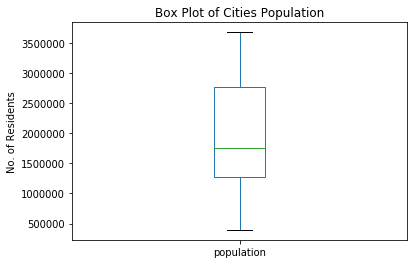

In [40]:
import matplotlib.pyplot as plt
cities_geodata_df['population'].plot(kind = 'box', showfliers=False)
plt.title('Box Plot of Cities Population')
plt.ylabel('No. of Residents')

### K-means clustering

Let us first cluster the dataset based on population in 3 Cluster: Mega-city - Middel town - Small town

In [78]:
subset_Population = cities_geodata_df[['population']]

In [79]:
cluster_num = 3
subset_Population_kmeans = KMeans(n_clusters = cluster_num, random_state = 0).fit(subset_Population)

In [80]:
cities_geodata_df.insert(0,'Cluster Population', subset_Population_kmeans.labels_)


,Cluster Population,city,lat,lng,country,iso2,iso3,capital,population,Park,...,Pool,Playground,Cinema,Museum,Highschool,Kindergarden,Medical Center,Opera,Garden,Population_N
0,1,Paris,48.8667,2.3333,France,FR,FRA,primary,9904000,50,...,21,50,9,50,48,11,20,1,49,
1,1,London,51.5000,-0.1167,United Kingdom,GB,GBR,primary,8567000,50,...,13,43,12,50,47,4,48,6,50,
2,2,Toronto,43.7000,-79.4200,Canada,CA,CAN,admin,5213000,38,...,8,24,3,0,5,2,1,0,10,
3,2,Montreal,45.5000,-73.5833,Canada,CA,CAN,,3678000,50,...,34,23,4,35,50,15,18,1,11,
4,2,Berlin,52.5218,13.4015,Germany,DE,DEU,primary,3406000,49,...,9,47,2,50,26,40,25,2,38,


In [81]:
cities_geodata_df.head(26)

,Cluster Population,city,lat,lng,country,iso2,iso3,capital,population,Park,...,Pool,Playground,Cinema,Museum,Highschool,Kindergarden,Medical Center,Opera,Garden,Population_N
0,1,Paris,48.8667,2.3333,France,FR,FRA,primary,9904000,50,...,21,50,9,50,48,11,20,1,49,
1,1,London,51.5000,-0.1167,United Kingdom,GB,GBR,primary,8567000,50,...,13,43,12,50,47,4,48,6,50,
2,2,Toronto,43.7000,-79.4200,Canada,CA,CAN,admin,5213000,38,...,8,24,3,0,5,2,1,0,10,
3,2,Montreal,45.5000,-73.5833,Canada,CA,CAN,,3678000,50,...,34,23,4,35,50,15,18,1,11,
4,2,Berlin,52.5218,13.4015,Germany,DE,DEU,primary,3406000,49,...,9,47,2,50,26,40,25,2,38,
5,2,Stuttgart,48.7800,9.2000,Germany,DE,DEU,admin,2944700,23,...,5,25,3,22,19,8,19,1,10,
6,2,Frankfurt,50.1000,8.6750,Germany,DE,DEU,minor,2895000,46,...,2,27,3,44,2,10,32,6,24,
7,0,Vienna,48.2000,16.3666,Austria,AT,AUT,primary,2400000,50,...,12,49,6,50,48,7,32,7,38,
8,0,Mannheim,49.5004,8.4700,Germany,DE,DEU,minor,2362000,17,...,2,8,2,13,14,5,14,0,8,
9,0,Vancouver,49.2734,-123.1216,Canada,CA,CAN,,2313328,50,...,30,24,4,24,27,4,48,2,33,


In [84]:
MegaCity = cities_geodata_df[cities_geodata_df['Cluster Population'] == 1]
MiddleTown = cities_geodata_df[cities_geodata_df['Cluster Population'] == 2]
Smalltown = cities_geodata_df[cities_geodata_df['Cluster Population'] == 0]
print( 'Number of Mega-Cities: ' + str(len(MegaCity)))
print( 'Number of Middle-Towns: ' + str(len(MiddleTown)))
print( 'Number of Small-Towns: ' + str(len(Smalltown)))

Number of Mega-Cities: 2
Number of Middle-Towns: 5
Number of Small-Towns: 19


([<matplotlib.axis.XTick at 0x7f873f265be0>,
 <a list of 3 Text xticklabel objects>)

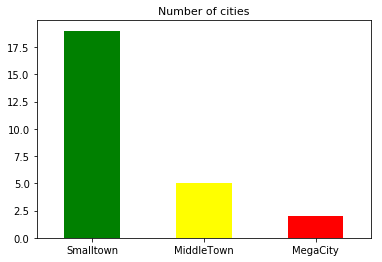

In [85]:
#Box plot of above data
cities_geodata_df['Cluster Population'].value_counts().plot(kind = 'bar', color =['green', 'yellow', 'red'])
plt.title('Number of cities', fontsize = 11)
plt.xticks(np.arange(3), ('Smalltown', 'MiddleTown', 'MegaCity'), rotation = 'horizontal')

I will investigate on 3 subsets of our data to serve different needs: some people might be more interested in cultural life, some in schools and education, for some of them each kind of venue might be helpful for their desicion making. 
I assume that natural environment and recreation are important for everyone. 
So those will be our subsets:

- Subset 1: Cultural life and natural environment/  recreation
- Subset 2: Education and natural environment/  recreation
- Subset 3: All venues

In [58]:
subset1_Culture_Nature = cities_geodata_df[['population',  'Park', 'Garden', 'Medical Center', 'Library', 'Cinema', 'Museum', 'Opera']]
print(subset1_Culture_Nature.shape)
subset1_Culture_Nature.head(5)

(26, 8)


,population,Park,Garden,Medical Center,Library,Cinema,Museum,Opera
0,9904000,50,49,20,50,9,50,1
1,8567000,50,50,48,46,12,50,6
2,5213000,38,10,1,9,3,0,0
3,3678000,50,11,18,13,4,35,1
4,3406000,49,38,25,25,2,50,2


In [59]:
subset2_Education_Nature = cities_geodata_df[['population',  'Park', 'Garden', 'Medical Center', 'Library', 'Cinema', 'Museum', 'Opera']]
print(subset2_Education_Nature.shape)
subset2_Education_Nature.head(5)

(26, 8)


,population,Park,Garden,Medical Center,Library,Cinema,Museum,Opera
0,9904000,50,49,20,50,9,50,1
1,8567000,50,50,48,46,12,50,6
2,5213000,38,10,1,9,3,0,0
3,3678000,50,11,18,13,4,35,1
4,3406000,49,38,25,25,2,50,2


In [60]:
subset3_all = cities_geodata_df[[ 'population',  'Park', 'Garden', 'Medical Center', 'Library', 'Cinema', 'Museum', 'Opera', 'Pool', 'Playground', 'Highschool', 'Kindergarden']]
print(subset3_all.shape)
subset3_all.head(5)

(26, 12)


,population,Park,Garden,Medical Center,Library,Cinema,Museum,Opera,Pool,Playground,Highschool,Kindergarden
0,9904000,50,49,20,50,9,50,1,21,50,48,11
1,8567000,50,50,48,46,12,50,6,13,43,47,4
2,5213000,38,10,1,9,3,0,0,8,24,5,2
3,3678000,50,11,18,13,4,35,1,34,23,50,15
4,3406000,49,38,25,25,2,50,2,9,47,26,40


#### Let us find out the optimal number of clusters within the first subset:

In [56]:
from sklearn.cluster import KMeans

In [61]:
elbow = []
for k in range(1,len(subset1_Culture_Nature)):
    km = KMeans(n_clusters = k, random_state = 0).fit(subset1_Culture_Nature)
    elbow.append(km.inertia_)

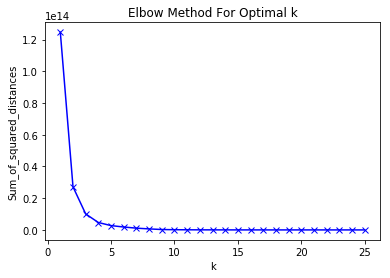

In [62]:
K = range(1,len(subset1_Culture_Nature))
plt.plot(K,  elbow,'bx-')
plt.xlabel('k')  
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

So 3 clusters seems to be appropriate for our dataset

In [64]:
cluster_num = 3
Culture_Nature_kmeans = KMeans(n_clusters = cluster_num, random_state = 0).fit(subset1_Culture_Nature)

In [67]:
cities_geodata_df.insert(0,'Cluster', Culture_Nature_kmeans.labels_)


ValueError: cannot insert Cluster, already exists

In [69]:
cities_geodata_df.head(26)

,Cluster,city,lat,lng,country,iso2,iso3,capital,population,Park,...,Pool,Playground,Cinema,Museum,Highschool,Kindergarden,Medical Center,Opera,Garden,Population_N
0,1,Paris,48.8667,2.3333,France,FR,FRA,primary,9904000,50,...,21,50,9,50,48,11,20,1,49,1.000000
1,1,London,51.5000,-0.1167,United Kingdom,GB,GBR,primary,8567000,50,...,13,43,12,50,47,4,48,6,50,0.859411
2,2,Toronto,43.7000,-79.4200,Canada,CA,CAN,admin,5213000,38,...,8,24,3,0,5,2,1,0,10,0.506729
3,2,Montreal,45.5000,-73.5833,Canada,CA,CAN,,3678000,50,...,34,23,4,35,50,15,18,1,11,0.345319
4,2,Berlin,52.5218,13.4015,Germany,DE,DEU,primary,3406000,49,...,9,47,2,50,26,40,25,2,38,0.316718
5,2,Stuttgart,48.7800,9.2000,Germany,DE,DEU,admin,2944700,23,...,5,25,3,22,19,8,19,1,10,0.268211
6,2,Frankfurt,50.1000,8.6750,Germany,DE,DEU,minor,2895000,46,...,2,27,3,44,2,10,32,6,24,0.262984
7,0,Vienna,48.2000,16.3666,Austria,AT,AUT,primary,2400000,50,...,12,49,6,50,48,7,32,7,38,0.210934
8,0,Mannheim,49.5004,8.4700,Germany,DE,DEU,minor,2362000,17,...,2,8,2,13,14,5,14,0,8,0.206938
9,0,Vancouver,49.2734,-123.1216,Canada,CA,CAN,,2313328,50,...,30,24,4,24,27,4,48,2,33,0.201820


#### 2.2 Results section
#### 2.3 Discussion section, noted observations, recommendations based on the results
#### 2.4 Conclusion section

In [ ]:
#Neighborhoods_Good = crime_grp[crime_grp['Cluster_Labels'] == 0]
#Neighborhoods_Bad = crime_grp[crime_grp['Cluster_Labels'] == 1]
#Neighborhoods_Caut = crime_grp[crime_grp['Cluster_Labels'] == 2]

#sorted_df = Neighborhoods_Good.sort_values(by = 'Crime_Incid', axis = 0, ascending = True)                                            
#sorted_df.reset_index(drop = True, inplace = True)
#sorted_df.head(20)